<a href="https://colab.research.google.com/github/Aleksypruszkowski/Machine-Learning-MIMUW/blob/main/Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 - PCA
### Author: Aleksy Pruszkowski

# **Homework Assignment: Principal Component Analysis (PCA) on 3D Clustered Data**

-------------------------------

You are provided with a dataset containing 3-dimensional data points from three distinct classes. The dataset can be downloaded from the following link:

**[PCA Three Clusters Dataset](https://github.com/SzymonNowakowski/Machine-Learning-2024/blob/master/PCA_three_clusters_data.csv)**

Each data point is represented by three continuous features $(x, y, z)$ and belongs to one of three clusters.

## **Primary Question**

**Perform PCA on the provided dataset to find the two principal components and visualize the data in a 2D plot using these components.**

- Compare this PCA plot with the following 2D plots of the original data:
  - $x$ vs. $y$
  - $x$ vs. $z$
  - $y$ vs. $z$

**Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.**



## **Secondary Question**

Remember: before applying PCA, **standardize** the data so that each feature has a mean of 0 and a variance of 1.

**Why is standardization necessary before applying PCA?**

- Reflect on how differences in scale among features can impact the principal component directions.

## **Task & Deliverables**

1. **Colab Notebook**  
   - Create a **Colab notebook** that:
     - Performs PCA on the dataset and visualizes the first two principal components in a 2D scatter plot.
     - Includes separate 2D scatter plots for the original feature pairs: $(x, y)$, $(x, z)$, and $(y, z)$.
     - Clearly **answers** both the **primary** and **secondary** questions.
     - Uses Python code to perform PCA, standardize the data, and generate the required plots.
   - To answer the primary question, you may consider creating additional visualizations or charts beyond those listed above. For example, some students might choose to explore a 3D plot of the data. Feel free to experiment with different approaches.

2. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and include an **“Open in Colab”** badge in your notebook, so it can be launched directly from GitHub.






In [ ]:
import pandas as pd
import numpy as np

data_3D = pd.read_csv("PCA_three_clusters_data.csv")
df = pd.DataFrame(data_3D)
print(df.head())

X = df.iloc[:,0:3]
Y = df.iloc[:,3]

# print(X)
# print(Y)

# We center and standardise the data
X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)

# PCA
U, Sigma, VT = np.linalg.svd(X)
print(Sigma)

df_notscaled = pd.DataFrame(data_3D)

X_notscaled = df_notscaled.iloc[:,0:3]
Y_notscaled = df_notscaled.iloc[:,3]

          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0
[17.67768328 17.34867462 16.92699037]


In [ ]:
import plotly.express as px
from sklearn.decomposition import PCA
fig = px.scatter_3d(
    X, x='x', y='y', z='z', color=df['class'],
    title="3D dataset scaled",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
fig = px.scatter_3d(
    X_notscaled, x='x', y='y', z='z', color=df['class'],
    title="3D dataset not scaled",
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

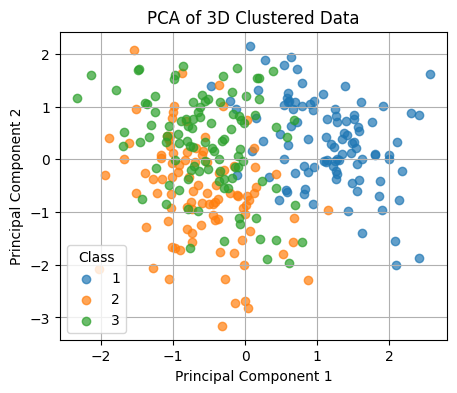

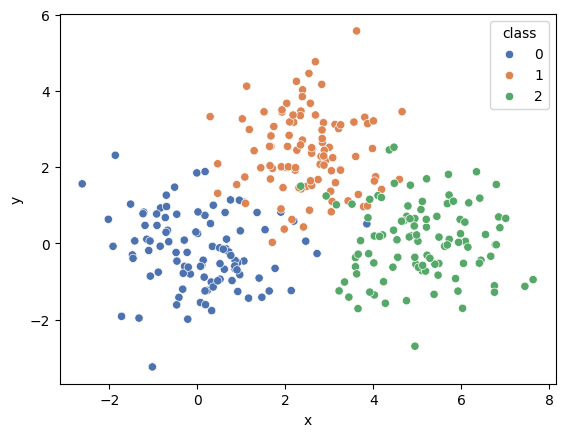

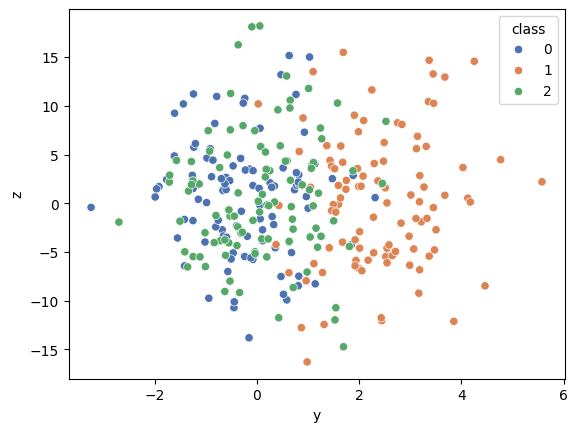

<Axes: xlabel='x', ylabel='z'>

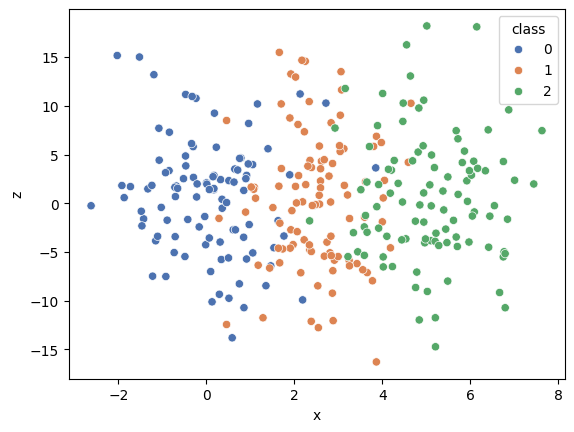

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Sigma_full = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(Sigma_full, Sigma)

XV = U @ Sigma_full

# target_name = np.ndarray({1,2,3})
# print(type(target_name))
target_name = np.array([1,2,3])

plt.figure(figsize=(5, 4))
for i, target_name in enumerate(target_name):
    plt.scatter(XV[Y == i, 0], XV[Y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of 3D Clustered Data")
plt.legend(title="Class")
plt.grid(True)
plt.show()

sns.scatterplot(x='x', y='y', data=df, hue='class',palette="deep")
plt.show()
sns.scatterplot(x='y', y='z', data=df, hue='class',palette="deep")
plt.show()
sns.scatterplot(x='x', y='z', data=df, hue='class',palette="deep")

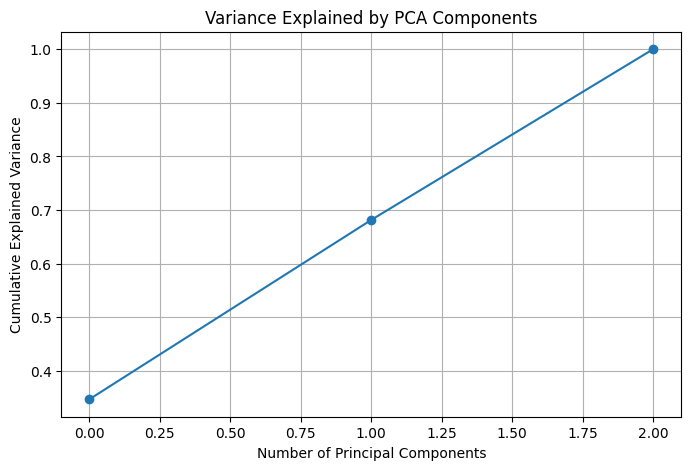

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:20]), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

### We see that first two components explain ~70% of variance, it's not enough to have an accurate model.

In [ ]:
import statistics


# PCA
U_notscaled, Sigma_notscaled, VT_notscaled = np.linalg.svd(X_notscaled)

print(Sigma)
print(Sigma_notscaled)

# print(a)
for i in range(0,3):
  print(i," ",statistics.stdev(X_notscaled.iloc[:,i]))

[17.67768328 17.34867462 16.92699037]
[109.74492713  60.65542771  27.11887009]
0   2.3003714750737205
1   1.5294093269658162
2   6.3265278583072595


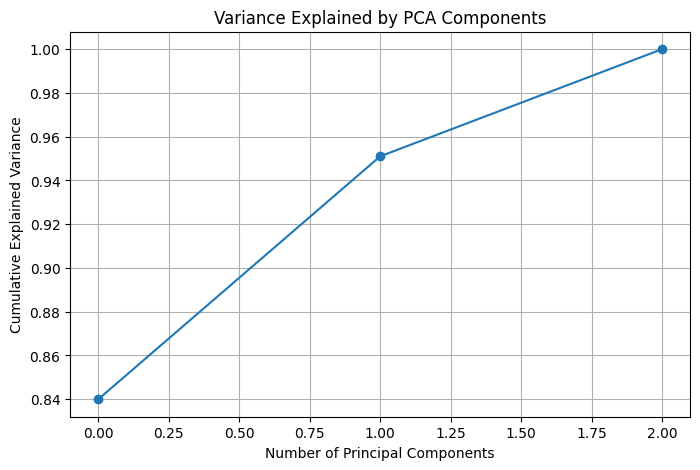

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca_notscaled = pca.fit_transform(X_notscaled)
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_[:20]), marker='o')
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Variance Explained by PCA Components")
plt.grid(True)
plt.show()

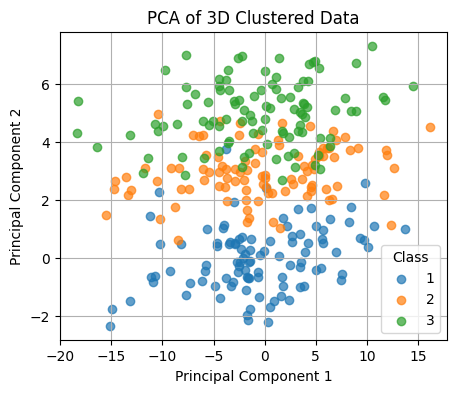

In [ ]:
Sigma_full_notscaled = np.zeros((X_notscaled.shape[0], X_notscaled.shape[1]))
np.fill_diagonal(Sigma_full_notscaled, Sigma_notscaled)

XV_notscaled = U_notscaled @ Sigma_full_notscaled

# target_name = np.ndarray({1,2,3})
# print(type(target_name))
target_name_notscaled = np.array([1,2,3])

plt.figure(figsize=(5, 4))
for i, target_name in enumerate(target_name_notscaled):
    plt.scatter(XV_notscaled[Y == i, 0], XV_notscaled[Y == i, 1], label=target_name, alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of 3D Clustered Data")
plt.legend(title="Class")
plt.grid(True)
plt.show()